In [8]:
%%javascript
// disable scroll
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// from https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling

<IPython.core.display.Javascript object>

In [9]:
"""import simpy
from __future__ import division"""

'import simpy\nfrom __future__ import division'

The mean of the exponential distribution is 0.887982
The mean of the long-tail distribution is 0.870100
The mean of the bimodal distribution is 0.894278
The mean of the normal distribution is 0.900133


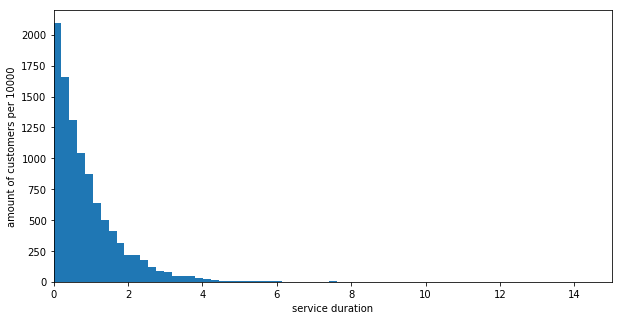

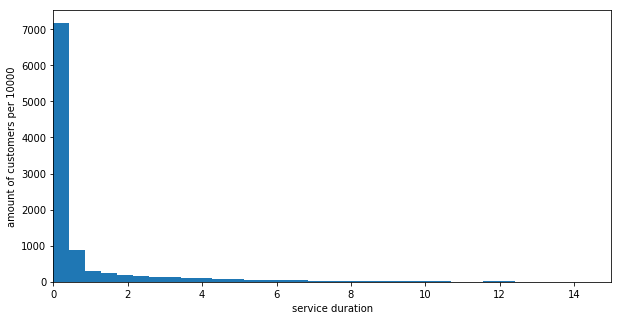

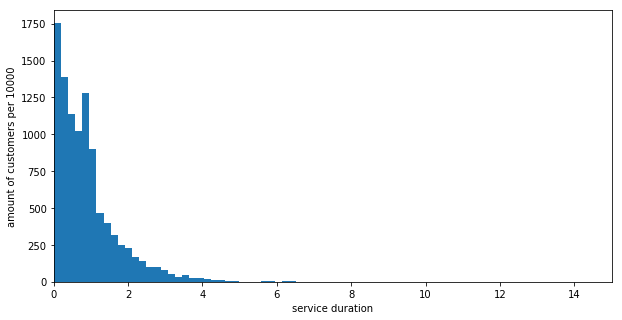

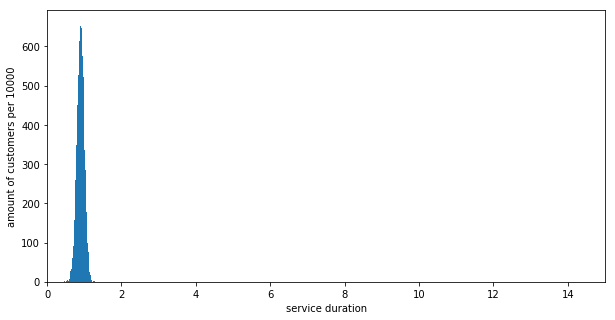

In [11]:
"""
Plot different distribution options
"""
import numpy as np
from matplotlib import pyplot as plt

distributions = ['exponential','long-tail','bimodal','normal']
samples = 10000
mu = 0.9

# exponential distribution
def server_time_exponential():
    server_time = np.random.exponential(mu,1)
    return server_time

# longtail distribution
def server_time_longtail():
    random_number = np.random.random()
    if random_number > 1./4:
        server_time = np.random.exponential(mu/5,1) # mu service time 
    if random_number <= 1./4:
        server_time = np.random.exponential(3.4*mu,1) # mu service time 
    return server_time

# bimodal distribution, with exponential and normal distribution
def server_time_bimodal():
    random_number = np.random.random()
    if random_number > 1./10:
        server_time = np.random.exponential(mu,1)
    if random_number <= 1./10:              
        server_time = [mu + np.random.normal()/10.]
    return server_time 

# normal distribution (check whether it can't be under 0)
def server_time_normal():
        server_time = [mu + np.random.normal()/10.]
        return server_time
        
times = [[],[],[],[]]
for n in range(samples):
    times[0].append(server_time_exponential()[0])
    times[1].append(server_time_longtail()[0])
    times[2].append(server_time_bimodal()[0])
    times[3].append(server_time_normal()[0])

for distibutionNumber in range(len(times)):
    print 'The mean of the %s distribution is %f' % (distributions[distibutionNumber], np.mean(times[distibutionNumber]))    
    
    plt.figure(figsize=(10,5))
    plt.hist(times[distibutionNumber], 50)
    plt.xlim((0, 15))
    plt.xlabel('service duration')
    plt.ylabel('amount of customers per %d' % (samples))
    plt.show;

In [5]:
print min(times[3])
print max(times[3])

0.499802517698
1.2892974019
